In [1]:
#Call library
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
#Set Max rows to show = 10
pd.options.display.max_rows = 10

In [3]:
#Extract Zip file
import zipfile 
zipfile.ZipFile('names.zip').extractall('.')

In [4]:
#Merge data files
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt',names=['name','sex','qty']).assign(year=year)
                     for year in range(1880,2019))
#Check Max/Min years data in table
allyears.year.min(), allyears.year.max()
#Save files as CSV
allyears.to_csv('allyear.csv.gz',index=False)

In [5]:
#Set dataframe prepare to data analysis
df = pd.read_csv('allyear.csv.gz')

In [6]:
#Challenge Objectives
# - Find the top 10 most common unisex names, and plot their popularity vs. year for both male and female versions
# - Unisex names : Those for which 0.5 < total qty of boys/ total qty of girls <2
sum_name_by_sex = df.groupby(['sex','name']).qty.sum()
sum_name_by_sex

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: qty, Length: 109173, dtype: int64

In [7]:
#Get man's names and girl's name
man_names, girl_names = sum_name_by_sex.loc['M'] ,sum_name_by_sex.loc['F']
#Do name ratio
name_ratio = (sum_name_by_sex.loc['M']/sum_name_by_sex.loc['F']).dropna()
#Filter only unisex names
unisex_name = name_ratio[(name_ratio<2) & (name_ratio>0.5)]
#Get only index (name)
unisex_name_index = unisex_name.index
#Mapping result and show only top5 names
sum_name_by_name = sum_name_by_sex.reset_index().set_index('name').groupby('name').qty.sum()
result = sum_name_by_name.loc[unisex_name_index].sort_values(ascending=False).head(10)
result.to_csv('result.csv')
#top 10 most common unisex names
result

name
Jessie     277674
Riley      201179
Casey      186947
Jackie     169199
Peyton     120657
Jaime      117885
Kerry       98195
Kendall     93317
Jody        86971
Frankie     74325
Name: qty, dtype: int64

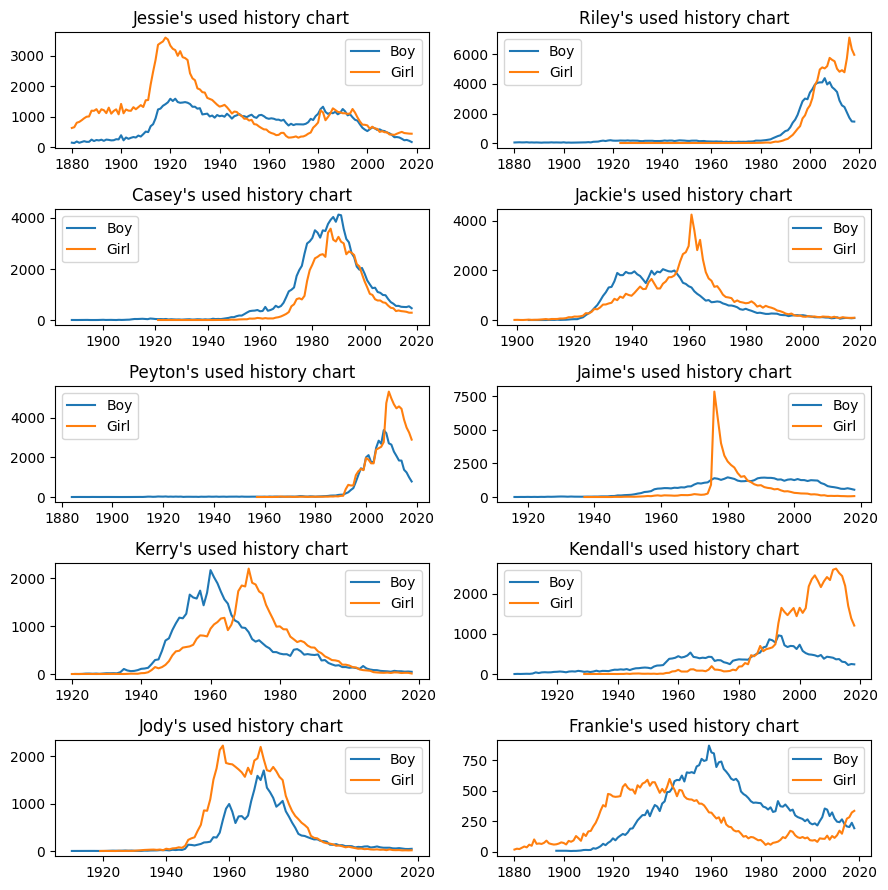

In [8]:
#Set data set for plot
name_pop_by_year = df.groupby(['sex','name','year']).qty.sum()
#Set pic size,
pp.figure(figsize=(9,9))
#Plot their popularity vs. year for both male and female versions
for i, name in enumerate(result.index) :
    #Set pic section
    pp.subplot(5,2,i+1)
    #boys
    pp.plot(name_pop_by_year.loc['M',name], label = 'Boy')
    #girls
    pp.plot(name_pop_by_year.loc['F',name], label = 'Girl')
    #legend and given chart's name
    pp.legend()
    pp.title(name+"'s used history chart")
pp.tight_layout()